#### **MiniProject 8 - Open Artifacts in Museum**


Data Source
​​https://ingeniumcanada.org/collection-research/artifact-open-data-set-mash-up
This is an open artifact data set from a museum.
Google Drive
https://drive.google.com/drive/u/2/folders/1U5ubMr0lw-QMxPBCoBXqGrkJHCBy1fl3


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
data= pd.read_excel(r'/content/gdrive/My Drive/mini project/Artifact_Analysis.xlsx')
display(pd.DataFrame(data))
df = pd.DataFrame(data)

,index,artifactNumber,ObjectName,Weight,Height,GeneralDescription,Category1,BeginDate,Material,Group,SubCategory1
0,0,A0000,Painting,70.118010,108.625539,Rare item,Sculpture,1960,Clay,D,Type2
1,1,A0001,Jewelry,54.073540,101.044557,Rare item,Textiles,1856,Bronze,A,Type3
2,2,A0002,Vase,31.643234,14.871993,Rare item,Ceramics,1851,Gold,C,Type2
3,3,A0003,Painting,81.565707,74.837087,Rare item,Metals,1936,Wood,A,Type2
4,4,A0004,Painting,68.788386,82.237168,Rare item,Metals,1981,Clay,D,Type2
...,...,...,...,...,...,...,...,...,...,...,...
95,95,A0095,Statue,47.922202,119.893514,Modern piece,Textiles,1910,Gold,D,Type3
96,96,A0096,Statue,67.088216,62.090527,Ancient artifact,Sculpture,1943,Gold,C,Type2
97,97,A0097,Jewelry,18.059667,25.089680,Rare item,Metals,1983,Wood,D,Type2
98,98,A0098,Statue,20.036613,26.275067,Rare item,Ceramics,1875,Silver,B,Type4


1.**Total # distinct artifactNumber.**


In [ ]:
total_distinct_artifactNumber = df['artifactNumber'].nunique()
print("Total distinct artifactNumber:", total_distinct_artifactNumber)

Total distinct artifactNumber: 100


2.**Total # distinct ObjectName.**

In [ ]:
total_distinct_objectName = df['GeneralDescription'].nunique()
print("Total distinct ObjectName:", total_distinct_objectName)

Total distinct ObjectName: 3


3.**Top 10 artifacts by weight.**


In [ ]:
top10_weight = df.nlargest(10, 'Weight').reset_index(drop=True)
top10_weight['rank_weight'] = range(1, 11)
print("\nTop 10 artifacts by weight:\n", tabulate(top10_weight, headers='keys', tablefmt='grid'))


Top 10 artifacts by weight:
 +----+---------+------------------+--------------+----------+----------+----------------------+-------------+-------------+------------+---------+----------------+---------------+
|    |   index | artifactNumber   | ObjectName   |   Weight |   Height | GeneralDescription   | Category1   |   BeginDate | Material   | Group   | SubCategory1   |   rank_weight |
+====+=========+==================+==============+==========+==========+======================+=============+=============+============+=========+================+===============+
|  0 |      31 | A0031            | Vase         |  99.972  | 125.963  | Rare item            | Textiles    |        1884 | Gold       | B       | Type2          |             1 |
+----+---------+------------------+--------------+----------+----------+----------------------+-------------+-------------+------------+---------+----------------+---------------+
|  1 |      32 | A0032            | Jewelry      |  99.667  | 146.069 

4.**Top 10 artifacts by height.**


In [ ]:
top10_height = df.nlargest(10, 'Height').reset_index(drop=True)
top10_height['rank_height'] = range(1, 11)
print("\nTop 10 artifacts by height:\n", tabulate(top10_height, headers='keys', tablefmt='grid'))


Top 10 artifacts by height:
 +----+---------+------------------+--------------+----------+----------+----------------------+-------------+-------------+------------+---------+----------------+---------------+
|    |   index | artifactNumber   | ObjectName   |   Weight |   Height | GeneralDescription   | Category1   |   BeginDate | Material   | Group   | SubCategory1   |   rank_height |
+====+=========+==================+==============+==========+==========+======================+=============+=============+============+=========+================+===============+
|  0 |      91 | A0091            | Jewelry      | 64.4466  |  198.339 | Modern piece         | Sculpture   |        1931 | Silver     | D       | Type1          |             1 |
+----+---------+------------------+--------------+----------+----------+----------------------+-------------+-------------+------------+---------+----------------+---------------+
|  1 |      84 | A0084            | Painting     | 63.7067  |  197.679

5.**Top 10 category1 by total # artifacts.**

In [ ]:
top10_category1 = (df.groupby('Category1')['artifactNumber']
                     .count()
                     .reset_index(name='num_artifactNumber')
                     .sort_values(by='num_artifactNumber', ascending=False)
                     .head(10)
                     .reset_index(drop=True))
top10_category1['rank_category1'] = range(1,5)
print("\nTop 10 category1 by total # artifacts:\n", tabulate(top10_category1, headers='keys', tablefmt='grid'))


Top 10 category1 by total # artifacts:
 +----+-------------+----------------------+------------------+
|    | Category1   |   num_artifactNumber |   rank_category1 |
+====+=============+======================+==================+
|  0 | Sculpture   |                   33 |                1 |
+----+-------------+----------------------+------------------+
|  1 | Textiles    |                   24 |                2 |
+----+-------------+----------------------+------------------+
|  2 | Ceramics    |                   22 |                3 |
+----+-------------+----------------------+------------------+
|  3 | Metals      |                   21 |                4 |
+----+-------------+----------------------+------------------+


6.**Top 10 BeingDate by # artifactNumber.**

In [ ]:
top10_beginDate = (df.groupby('BeginDate')['artifactNumber']
                      .count()
                      .reset_index(name='num_artifactNumber')
                      .sort_values(by='num_artifactNumber', ascending=False)
                      .head(10)
                      .reset_index(drop=True))
top10_beginDate['rank_beginDate'] = range(1,11)
print("\nTop 10 beginDate by # artifactNumber:\n", tabulate(top10_beginDate, headers='keys', tablefmt='grid'))


Top 10 beginDate by # artifactNumber:
 +----+-------------+----------------------+------------------+
|    |   BeginDate |   num_artifactNumber |   rank_beginDate |
+====+=============+======================+==================+
|  0 |        1914 |                    4 |                1 |
+----+-------------+----------------------+------------------+
|  1 |        1983 |                    3 |                2 |
+----+-------------+----------------------+------------------+
|  2 |        1903 |                    2 |                3 |
+----+-------------+----------------------+------------------+
|  3 |        1851 |                    2 |                4 |
+----+-------------+----------------------+------------------+
|  4 |        1993 |                    2 |                5 |
+----+-------------+----------------------+------------------+
|  5 |        1989 |                    2 |                6 |
+----+-------------+----------------------+------------------+
|  6 |        1

7.**Top 10 material by # artifactNumber.**

In [ ]:
top10_material = (df.groupby('Material')['artifactNumber']
                     .count()
                     .reset_index(name='num_artifactnumber_mat')
                     .sort_values(by='num_artifactnumber_mat', ascending=False)
                     .head(10)
                     .reset_index(drop=True))
top10_material['rank_material'] = range(1, 6)
print("\nTop 10 material by # artifactNumber:\n", tabulate(top10_material, headers='keys', tablefmt='grid'))


Top 10 material by # artifactNumber:
 +----+------------+--------------------------+-----------------+
|    | Material   |   num_artifactnumber_mat |   rank_material |
+====+============+==========================+=================+
|  0 | Clay       |                       25 |               1 |
+----+------------+--------------------------+-----------------+
|  1 | Silver     |                       22 |               2 |
+----+------------+--------------------------+-----------------+
|  2 | Wood       |                       21 |               3 |
+----+------------+--------------------------+-----------------+
|  3 | Gold       |                       20 |               4 |
+----+------------+--------------------------+-----------------+
|  4 | Bronze     |                       12 |               5 |
+----+------------+--------------------------+-----------------+


8.**Merge 3 and 4 on their corresponding rank columns.**


In [ ]:
merged_weight_height = pd.merge(top10_weight, top10_height, left_on='rank_weight', right_on='rank_height', suffixes=('_weight', '_height'))
print("\nMerged weight and height data:\n", tabulate(merged_weight_height, headers='keys', tablefmt='grid'))


Merged weight and height data:
 +----+----------------+-------------------------+---------------------+-----------------+-----------------+-----------------------------+--------------------+--------------------+-------------------+----------------+-----------------------+---------------+----------------+-------------------------+---------------------+-----------------+-----------------+-----------------------------+--------------------+--------------------+-------------------+----------------+-----------------------+---------------+
|    |   index_weight | artifactNumber_weight   | ObjectName_weight   |   Weight_weight |   Height_weight | GeneralDescription_weight   | Category1_weight   |   BeginDate_weight | Material_weight   | Group_weight   | SubCategory1_weight   |   rank_weight |   index_height | artifactNumber_height   | ObjectName_height   |   Weight_height |   Height_height | GeneralDescription_height   | Category1_height   |   BeginDate_height | Material_height   | Group_heig

9.**Top 10 group by # artifactNumber.**


In [ ]:
top10_group = (df.groupby('Group')['artifactNumber']
                  .count()
                  .reset_index(name='num_artifactnumber_group')
                  .sort_values(by='num_artifactnumber_group', ascending=False)
                  .head(10)
                  .reset_index(drop=True))
top10_group['rank_group'] = range(1, 5)
print("\nTop 10 group by # artifactNumber:\n", tabulate(top10_group, headers='keys', tablefmt='grid'))


Top 10 group by # artifactNumber:
 +----+---------+----------------------------+--------------+
|    | Group   |   num_artifactnumber_group |   rank_group |
+====+=========+============================+==============+
|  0 | D       |                         28 |            1 |
+----+---------+----------------------------+--------------+
|  1 | B       |                         26 |            2 |
+----+---------+----------------------------+--------------+
|  2 | A       |                         24 |            3 |
+----+---------+----------------------------+--------------+
|  3 | C       |                         22 |            4 |
+----+---------+----------------------------+--------------+


10.**Top 10 subcategory1 by total # artifacts.**

In [ ]:
top10_subcategory1 = (df.groupby('SubCategory1')['artifactNumber']
                         .count()
                         .reset_index(name='num_artifactNumber')
                         .sort_values(by='num_artifactNumber', ascending=False)
                         .head(10)
                         .reset_index(drop=True))
top10_subcategory1['rank_subcategory1'] = range(1, 5)
print("\nTop 10 subcategory1 by total # artifacts:\n", tabulate(top10_subcategory1, headers='keys', tablefmt='grid'))


Top 10 subcategory1 by total # artifacts:
 +----+----------------+----------------------+---------------------+
|    | SubCategory1   |   num_artifactNumber |   rank_subcategory1 |
+====+================+======================+=====================+
|  0 | Type1          |                   29 |                   1 |
+----+----------------+----------------------+---------------------+
|  1 | Type2          |                   29 |                   2 |
+----+----------------+----------------------+---------------------+
|  2 | Type4          |                   22 |                   3 |
+----+----------------+----------------------+---------------------+
|  3 | Type3          |                   20 |                   4 |
+----+----------------+----------------------+---------------------+


11.**Merge 7 and 9 on their corresponding rank columns.**

In [ ]:
merged_material_group = pd.merge(top10_material, top10_group,
                                  left_on='rank_material', right_on='rank_group')
merged_material_group = merged_material_group[['rank_material', 'num_artifactnumber_mat', 'num_artifactnumber_group']]

merged_material_group.columns = ['rank', 'num_artifactnumber_mat', 'num_artifactnumber_group']

print("\nMerged material and group data:\n", tabulate(merged_material_group, headers='keys', tablefmt='grid'))



Merged material and group data:
 +----+--------+--------------------------+----------------------------+
|    |   rank |   num_artifactnumber_mat |   num_artifactnumber_group |
+====+========+==========================+============================+
|  0 |      1 |                       25 |                         28 |
+----+--------+--------------------------+----------------------------+
|  1 |      2 |                       22 |                         26 |
+----+--------+--------------------------+----------------------------+
|  2 |      3 |                       21 |                         24 |
+----+--------+--------------------------+----------------------------+
|  3 |      4 |                       20 |                         22 |
+----+--------+--------------------------+----------------------------+


In [ ]:
# Generate random DataFrame
def generate_random_dataframe(num_rows=1000, num_features=10):
    np.random.seed(42)  # For reproducibility
    data = np.random.rand(num_rows, num_features)  # Random features
    is_fraud = np.random.choice([0, 1], size=(num_rows,), p=[0.9, 0.1])  # Imbalanced class distribution
    columns = [f'feature_{i+1}' for i in range(num_features)] + ['Is_fraud']
    df = pd.DataFrame(data, columns=columns[:-1])
    df['Is_fraud'] = is_fraud
    return df

# Generate the DataFrame
df = generate_random_dataframe()
display(pd.DataFrame(df))

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,Is_fraud
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,0
1,0.020584,0.969910,0.832443,0.212339,0.181825,0.183405,0.304242,0.524756,0.431945,0.291229,0
2,0.611853,0.139494,0.292145,0.366362,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,0
3,0.607545,0.170524,0.065052,0.948886,0.965632,0.808397,0.304614,0.097672,0.684233,0.440152,0
4,0.122038,0.495177,0.034389,0.909320,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854,0
...,...,...,...,...,...,...,...,...,...,...,...
995,0.512429,0.672714,0.387131,0.251308,0.166201,0.349474,0.741806,0.756705,0.666905,0.234028,0
996,0.588086,0.570690,0.484266,0.549979,0.491791,0.565456,0.715506,0.109628,0.749626,0.135886,1
997,0.066628,0.976080,0.956992,0.060437,0.443253,0.186245,0.485345,0.830177,0.950612,0.634253,0
998,0.353906,0.603326,0.312001,0.909824,0.870400,0.558232,0.324799,0.293390,0.033418,0.815821,0


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:13:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:13:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Average Precision: 0.0000
Average Recall: 0.0000
Average F1-score: 0.0000
Average Accuracy: 0.8930


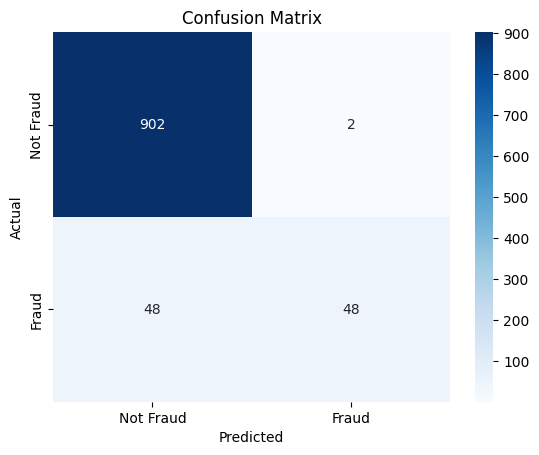

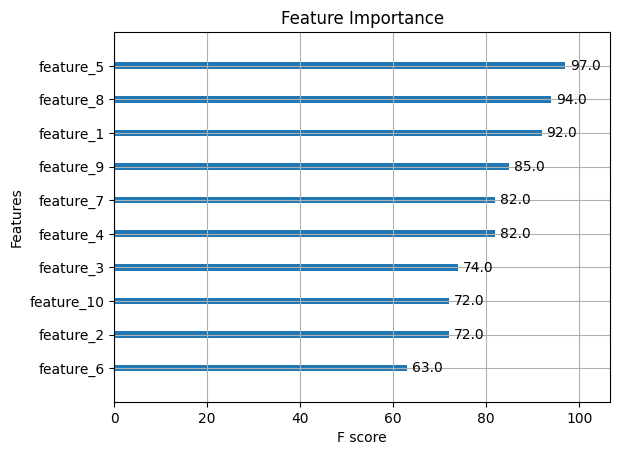

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop('Is_fraud', axis=1)
y = df['Is_fraud']

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

precision_list = []
recall_list = []
f1_list = []
accuracy_list = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    precision = (classification_report(y_test, y_pred, output_dict=True)['1']['precision'])
    recall = (classification_report(y_test, y_pred, output_dict=True)['1']['recall'])
    f1 = (classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'])
    accuracy = (classification_report(y_test, y_pred, output_dict=True)['accuracy'])

    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    accuracy_list.append(accuracy)

print(f'Average Precision: {np.mean(precision_list):.4f}')
print(f'Average Recall: {np.mean(recall_list):.4f}')
print(f'Average F1-score: {np.mean(f1_list):.4f}')
print(f'Average Accuracy: {np.mean(accuracy_list):.4f}')

y_pred_final = model.predict(X)
conf_matrix = confusion_matrix(y, y_pred_final)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

xgb.plot_importance(model, importance_type='weight')
plt.title('Feature Importance')
plt.show()
